In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **1. Data Understanding**

## 1.1. Data Collection
## 1.2. Data Shape
## 1.3. Data Info and Types
## 1.4. Data Statistical Describtion
## 1.5. Data Profiling
## 1.6. Data Issues Identification
  *  Invalid Entries
  *  Duplicates
  *  Missing Values







In [2]:
# 1.1. Data Collection

df_train=pd.read_csv('train.csv')
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
# 1.2. Data Shape

df_train.shape

(188533, 13)

In [4]:
# 1.3. Data Info & Data Tpyes

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
# 1.4. Data Statistical Description

df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [6]:
# 1.5. Data Profiling

# Unique values in categorical columns
for col in df_train.select_dtypes(include='object'):
    print(f"{col}: {df_train[col].unique()}")


brand: ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
model: ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']
fuel_type: ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
engine: ['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability' ...
 '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel'
 '139.0HP 1.6L 4 Cylind

In [7]:
# 1.6. Identifying Data Issues

# Check for invalid entries
invalid_entries = df_train[df_train.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:\n", invalid_entries)

# Duplicates
duplicates = df_train.duplicated().sum()
print('Number of Duplicate Records:\n', duplicates)

# Missing Values
missing_values = df_train.isnull().sum()
print("Number of missing values in each column: \n", missing_values)

Invalid Entries:
 id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64
Number of Duplicate Records:
 0
Number of missing values in each column: 
 id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


# **2. Data Visualization (Initial)**
##2.1. Histograms
##2.2. BoxPlot
##2.3. Correlation Matrix


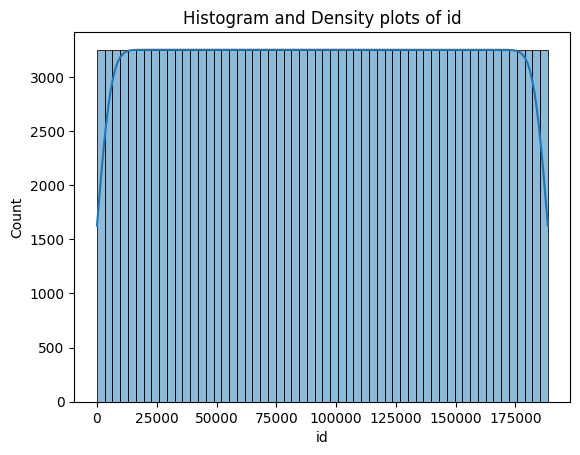

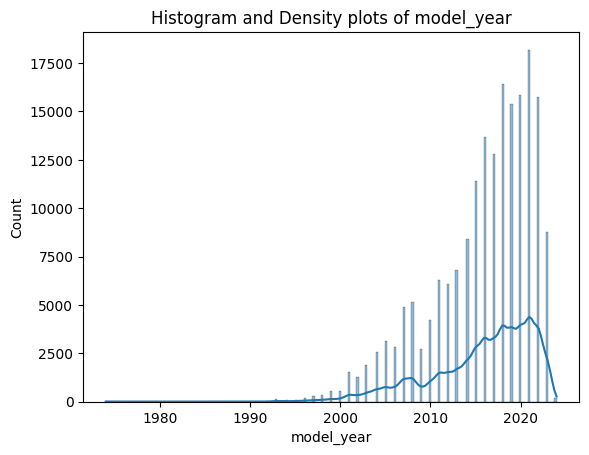

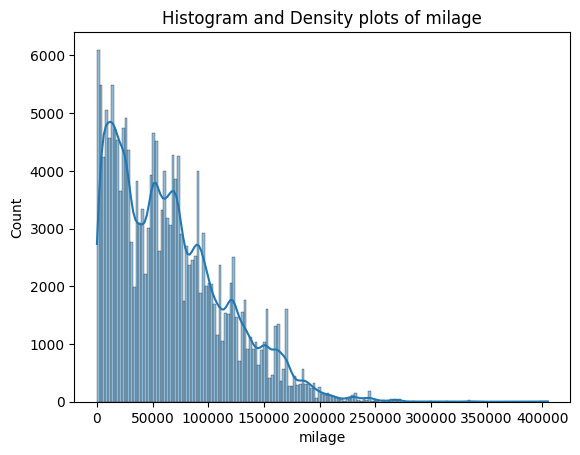

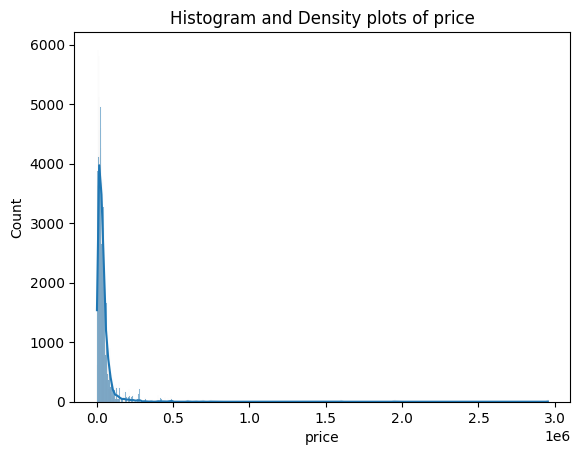

In [8]:
# 2.1. Histograms: examine distributions & skewness of data

for col in df_train.select_dtypes(include=['number']).columns:
  sns.histplot(df_train[col], kde = True)
  plt.title(f'Histogram and Density plots of {col}')
  plt.show()

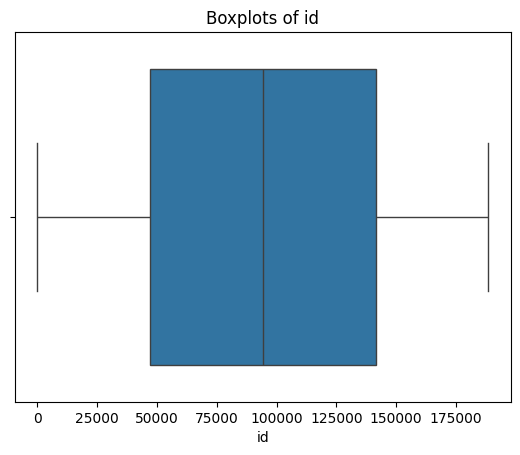

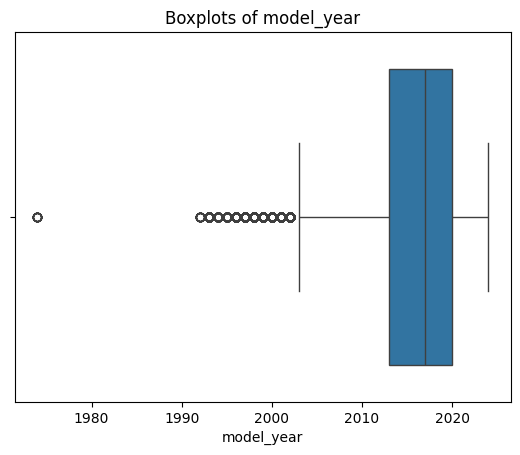

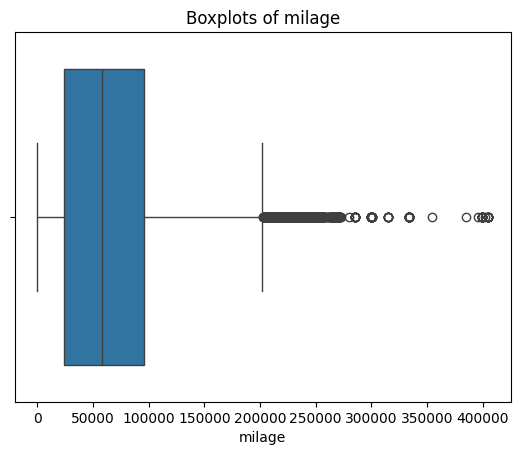

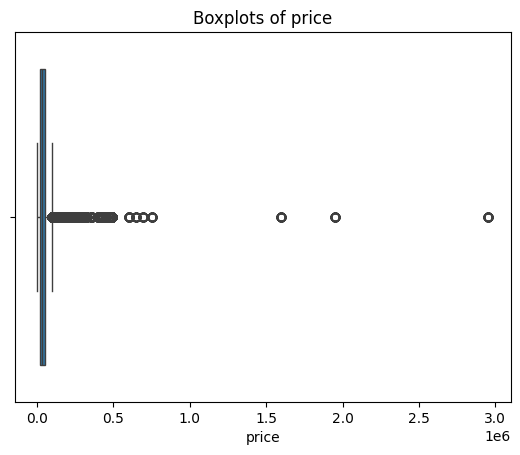

In [9]:
# 2.2. Boxplots: to observe the outliers easily

for col in df_train.select_dtypes(include=['number']).columns:
  sns.boxplot(x = df_train[col])
  plt.title(f'Boxplots of {col}')
  plt.show()

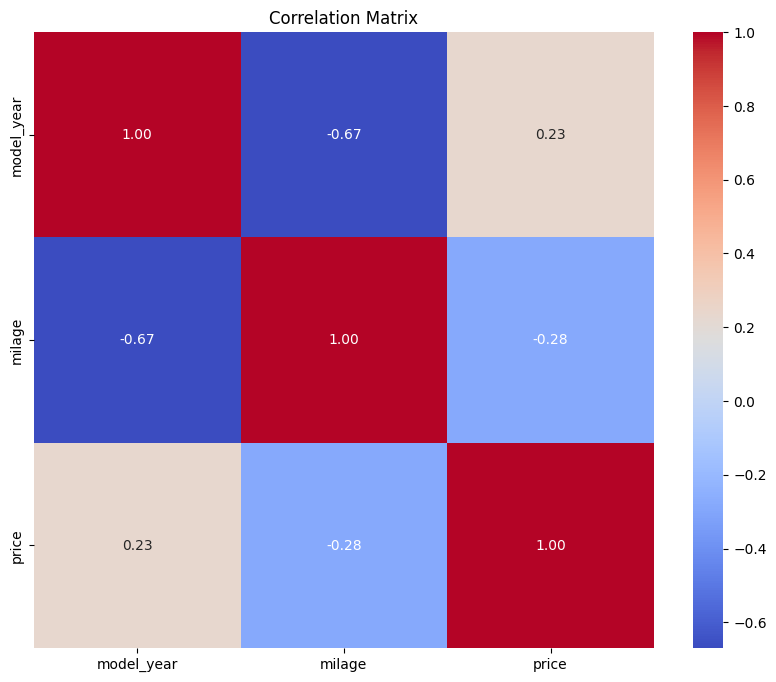

In [10]:
# 2.3. Correlation Matrix: identify strength & direction of relationships between variables

specific_columns = ['model_year', 'milage', 'price']

correlation_matrix = df_train[specific_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Comment: Positive values of correlation coefficients indicate a direct relationship, while negative values indicate an inverse relationship with our target variable.

# 3. **Data Preprocesing**

## 3.1. Dimensionality Reduction
## 3.2. Feature Engineering
## 3.3. Grouping Categorical Varibles
## 3.4. Handling Missing Values
## 3.5. Handling Outliers

In [11]:
# Capitalize column names

df_train.rename(columns={col: col.capitalize() for col in df_train.columns}, inplace=True)

**Column 1: Id**

**Column 12: Clean_title**

In [12]:
# Droping the 'Clean_title' Column
df_train= df_train.drop(['Clean_title'], axis=1)

# Droping the 'Id' column
df_train= df_train.drop(['Id'],axis=1)

Reasons to Drop the Clean_tile
No Predictive Power: A column with only one class will not help in distinguishing between different outcomes, making it irrelevant for predictive modeling.

Avoiding Overfitting: Including such columns might lead to overfitting, where the model learns noise rather than the actual patterns in the data.

# 3.2. Feature Engineering

In [13]:
# Checking uniquesness in each column
import gc

categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

gc.collect()

Brand: 57 unique values
Model: 1897 unique values
Fuel_type: 7 unique values
Engine: 1117 unique values
Transmission: 52 unique values
Ext_col: 319 unique values
Int_col: 156 unique values
Accident: 2 unique values


11273

**Column: Engine**

In [14]:
import re

# Function to extract HP(HorsePower), L(Litre), New_Fuel_Type and Cylinder from the Engine column
def extract_engine_features(df_train):

    # Extract HP (e.g., "172.0HP")
    df_train['HP'] = df_train['Engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)

    # Extract L (e.g., "1.6L")
    df_train['L'] = df_train['Engine'].str.extract(r'(\d+\.?\d*)L').astype(float)

    #Extract New_FT (fuel_type: like gasoline)
    df_train['New_Fuel_type']=df_train['Engine'].str.extract(r'(Gasoline|Flex Fuel|Diesel|Hybrid|Electric|Other)')

    # Extract Cylinder (e.g., "4 Cylinder")
    df_train['Cylinder'] = df_train['Engine'].str.extract(r'(\d+) Cylinder').astype(float)
    return df_train

# Apply the function to the dataset
df_train = extract_engine_features(df_train)

# Drop Engine column
df_train = df_train.drop(columns=['Engine'])

print(df_train)

                Brand                     Model  Model_year  Milage  \
0                MINI             Cooper S Base        2007  213000   
1             Lincoln                     LS V8        2002  143250   
2           Chevrolet         Silverado 2500 LT        2002  136731   
3             Genesis          G90 5.0 Ultimate        2017   19500   
4       Mercedes-Benz               Metris Base        2021    7388   
...               ...                       ...         ...     ...   
188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531           Audi          S5 3.0T Prestige        2022   13895   
188532        Porsche                Macan Base        2016   59500   

            Fuel_type                    Transmission  \
0            Gasoline                             A/T   
1            Gasoline            

In [16]:
# Missing Values
missing_values = df_train.isnull().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 Brand                0
Model                0
Model_year           0
Milage               0
Fuel_type         5083
Transmission         0
Ext_col              0
Int_col              0
Accident          2452
Price                0
HP               33259
L                14214
New_Fuel_type    31546
Cylinder         37855
dtype: int64


**Column: Transmission**

In [17]:
# Function to extract features from the 'transmission' column
def process_transmission(df_train):

    # Extract Speed (e.g., "6-Speed" -> 6)
    df_train['Speed'] = df_train['Transmission'].str.extract(r'(\d+)-Speed').astype(float)

    # Extract Transmission Type (e.g., "A/T", "M/T", "CVT")
    df_train['Transmission_Type'] = df_train['Transmission'].str.extract(r'(A/T|M/T|CVT|Manual|Automatic)')

    # Flag for "Overdrive" if mentioned in the transmission description
    df_train['Has_Overdrive'] = df_train['Transmission'].str.contains('Overdrive', case=False, na=False).astype(int)

    # Flag for "Dual Shift Mode" if mentioned
    df_train['Dual_Shift_Mode'] = df_train['Transmission'].str.contains('Dual Shift Mode', case=False, na=False).astype(int)
    return df_train

# Apply the feature engineering function
df_train = process_transmission(df_train)

# Drop Transmission column
df_train = df_train.drop(columns=['Transmission'])

print(df_train)

                Brand                     Model  Model_year  Milage  \
0                MINI             Cooper S Base        2007  213000   
1             Lincoln                     LS V8        2002  143250   
2           Chevrolet         Silverado 2500 LT        2002  136731   
3             Genesis          G90 5.0 Ultimate        2017   19500   
4       Mercedes-Benz               Metris Base        2021    7388   
...               ...                       ...         ...     ...   
188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531           Audi          S5 3.0T Prestige        2022   13895   
188532        Porsche                Macan Base        2016   59500   

            Fuel_type                    Ext_col Int_col  \
0            Gasoline                     Yellow    Gray   
1            Gasoline      

In [18]:
# Missing Values
missing_values = df_train.isnull().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 Brand                    0
Model                    0
Model_year               0
Milage                   0
Fuel_type             5083
Ext_col                  0
Int_col                  0
Accident              2452
Price                    0
HP                   33259
L                    14214
New_Fuel_type        31546
Cylinder             37855
Speed                84454
Transmission_Type    19868
Has_Overdrive            0
Dual_Shift_Mode          0
dtype: int64


## 3.3. Grouping Categorical Variables

**Column: Brand**



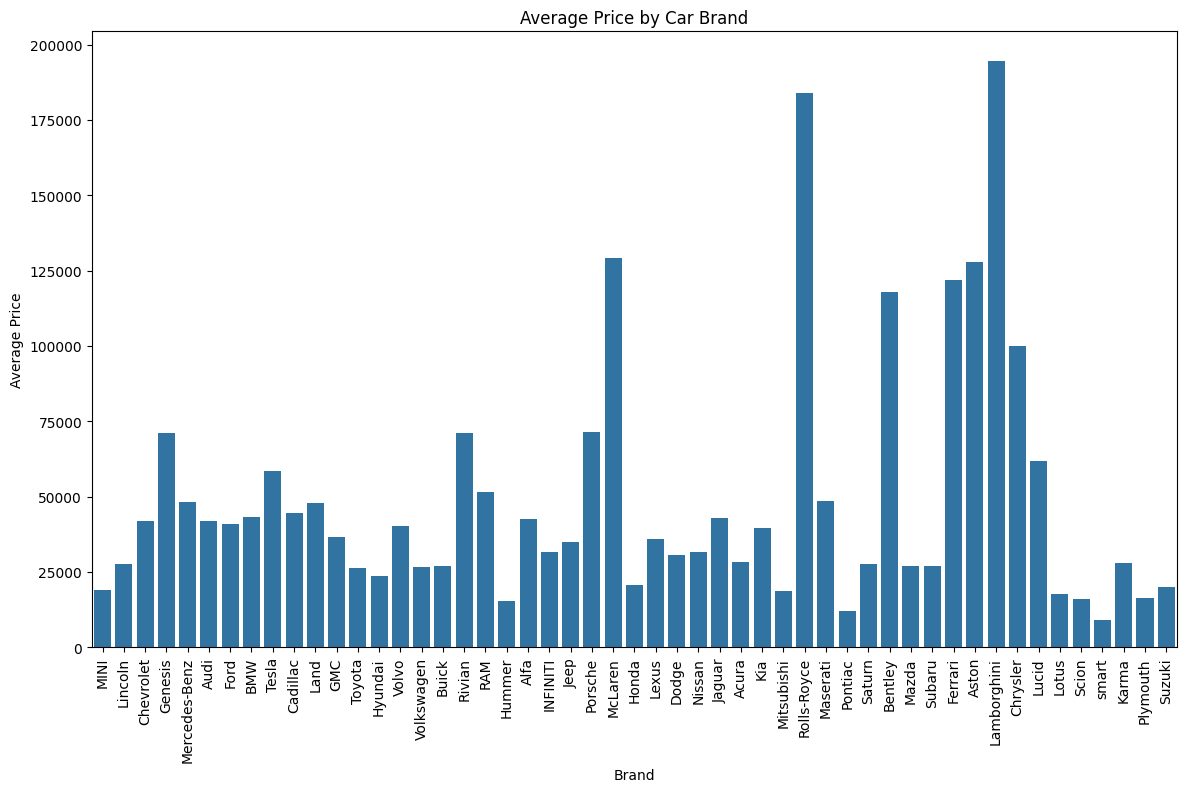

In [19]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Brand', y='Price', data=df_train[:10000], errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [20]:
df_filtered = df_train[df_train['Price'] > 100000]
num_variables = df_filtered.shape[1]
print(f"Number of variables after price of 100K: {num_variables}")

Number of variables after price of 100K: 17


In [21]:
# Define function to categorize brands by average price
def categorize_brands_by_price(df_train):

    # Calculate the average price for each brand
    avg_price_per_brand = df_train.groupby('Brand')['Price'].mean()

    # Define price categories
    price_bins = [0, 25000, 50000, 75000, float('inf')]
    price_labels = ['Cheap_Car', 'Medium_Car', 'Expensive_Car', 'Luxious_Car']

    # Map brands to categories based on average price
    brand_price_category = pd.cut(avg_price_per_brand, bins=price_bins, labels=price_labels)

    # Create a new column in the original DataFrame
    df_train['Brand_price_category'] = df_train['Brand'].map(brand_price_category.to_dict())

    return df_train

# Apply the function to categorize brands
df_train = categorize_brands_by_price(df_train)

print(df_train)

                Brand                     Model  Model_year  Milage  \
0                MINI             Cooper S Base        2007  213000   
1             Lincoln                     LS V8        2002  143250   
2           Chevrolet         Silverado 2500 LT        2002  136731   
3             Genesis          G90 5.0 Ultimate        2017   19500   
4       Mercedes-Benz               Metris Base        2021    7388   
...               ...                       ...         ...     ...   
188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531           Audi          S5 3.0T Prestige        2022   13895   
188532        Porsche                Macan Base        2016   59500   

            Fuel_type                    Ext_col Int_col  \
0            Gasoline                     Yellow    Gray   
1            Gasoline      

**Column: Model**

In [23]:
# Calculate average price per model
avg_price_per_model = df_train.groupby('Model')['Price'].mean()

# Define price bins and labels
price_bins = [0, 25000, 50000, 75000, float('inf')]
price_labels = ['Economy', 'Mid-range', 'Premium', 'Luxury']

# Assign categories to models
df_train['Model_Category'] = pd.cut(df_train['Model'].map(avg_price_per_model), bins=price_bins, labels=price_labels)
df_train

,Brand,Model,Model_year,Milage,Fuel_type,Ext_col,Int_col,Accident,Price,HP,L,New_Fuel_type,Cylinder,Speed,Transmission_Type,Has_Overdrive,Dual_Shift_Mode,Brand_price_category,Model_Category
0,MINI,Cooper S Base,2007,213000,Gasoline,Yellow,Gray,None reported,4200,172.0,1.6,Gasoline,4.0,NaN,A/T,0,0,Cheap_Car,Economy
1,Lincoln,LS V8,2002,143250,Gasoline,Silver,Beige,At least 1 accident or damage reported,4999,252.0,3.9,Gasoline,8.0,NaN,A/T,0,0,Medium_Car,Economy
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,Blue,Gray,None reported,13900,320.0,5.3,Flex Fuel,8.0,NaN,A/T,0,0,Medium_Car,Economy
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Black,Black,None reported,45000,420.0,5.0,Gasoline,8.0,NaN,NaN,0,1,Expensive_Car,Mid-range
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,Black,Beige,None reported,97500,208.0,2.0,Gasoline,4.0,7.0,A/T,0,0,Expensive_Car,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,White,Beige,None reported,27500,420.0,6.2,Gasoline,8.0,NaN,NaN,0,1,Medium_Car,Premium
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,White,Black,At least 1 accident or damage reported,30000,385.0,3.0,Gasoline,6.0,8.0,A/T,0,0,Expensive_Car,Premium
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,White,Black,None reported,86900,469.0,4.0,Gasoline,8.0,7.0,A/T,0,0,Expensive_Car,Premium
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,Daytona Gray Pearl Effect,Black,None reported,84900,NaN,3.0,NaN,NaN,1.0,Automatic,0,0,Medium_Car,Mid-range


**Column: Ext_Col (Exterior Color)**

In [24]:
# Define the groups for exterior colors based on their impact on car price
color_groups = {
    'Premium Colors': [
        'Snowflake White Pearl Metallic', 'Designo Diamond White Metallic', 'Obsidian Black Metallic',
        'Magnetite Gray Metallic', 'Nero Noctis', 'Caviar', 'Soul Red Crystal Metallic', 'Obsidian'
    ],
    'Popular Neutral Colors': [
        'Black', 'White', 'Silver', 'Gray', 'Beige', 'Platinum White Pearl', 'White Frost Tri-Coat'
    ],
    'Vibrant/High-Visibility Colors': [
        'Yellow', 'Red', 'Orange', 'Blue', 'Green', 'Ruby Red Metallic', 'Hyper Red'
    ],
    'Sporty/Performance Colors': [
        'Vega Blue', 'Rapid Red Metallic', 'Flame Red Clearcoat', 'Tango Red Metallic',
        'Atomic Silver', 'Magnetic Metallic'
    ],
    'Earth Tones & Darker Colors': [
        'Brown', 'Tan', 'Graphite Grey', 'Ebony Twilight Metallic', 'Midnight Black Metallic'
    ],
    'Special/Metallic Colors': [
        'Midnight Blue Metallic', 'Crystal Black Pearl', 'Magnetic Metallic', 'Selenite Grey Metallic',
        'Platinum Quartz Metallic', 'Granite Crystal Clearcoat'
    ]
}

# Function to assign a group to a color
def assign_group(color):
    for group, group_colors in color_groups.items():
        if color in group_colors:
            return group
    return 'Other'  # For colors not defined in groups

# Apply the function to the 'ext_col' column to create a new column 'Ext_Col_Group'
df_train['Ext_Col_Group'] = df_train['Ext_col'].apply(assign_group)

# Drop Ext_col column
df_train = df_train.drop(columns=['Ext_col'])

# Check the resulting dataframe
print(df_train.head())


           Brand              Model  Model_year  Milage      Fuel_type  \
0           MINI      Cooper S Base        2007  213000       Gasoline   
1        Lincoln              LS V8        2002  143250       Gasoline   
2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

  Int_col                                Accident  Price     HP    L  \
0    Gray                           None reported   4200  172.0  1.6   
1   Beige  At least 1 accident or damage reported   4999  252.0  3.9   
2    Gray                           None reported  13900  320.0  5.3   
3   Black                           None reported  45000  420.0  5.0   
4   Beige                           None reported  97500  208.0  2.0   

  New_Fuel_type  Cylinder  Speed Transmission_Type  Has_Overdrive  \
0      Gasoline       4.0    NaN               A/T   

**Column: Int_col (Interior Color)**

In [25]:
# Define the groups for interior colors based on their impact on car price
interior_color_groups = {
    'Premium Color': [
        'Jet Black', 'Global Black', 'Ebony', 'Charcoal', 'Obsidian Black', 'Black Onyx',
        'Ebony Black', 'Cappuccino', 'Parchment', 'Beige', 'Macchiato', 'Saddle Brown', 'Ivory / Ebony'
    ],
    'Neutral Colors': [
        'Gray', 'Beige', 'Silver', 'White', 'Brown', 'Slate', 'Tan', 'Sandstone', 'Light Platinum',
        'Medium Stone', 'Graphite', 'Platinum', 'Camel Leather', 'Light Titanium', 'Graphite w/Gun Metal'
    ],
    'Vibrant/Accent Colors': [
        'Orange', 'Red', 'Yellow', 'Sakhir Orange', 'Adrenaline Red', 'Pimento Red w/Ebony', 'Sport',
        'Hotspur', 'Grace White', 'Kyalami Orange', 'Tension', 'Sahara Tan', 'Classic Red'
    ],
    'Luxury/Exotic Colors': [
        'Canberra Beige', 'Boulder', 'Rioja Red', 'Magma Red', 'Rhapsody Blue', 'Rhapsody Blue', 'Nero Ade',
        'Deep Garnet', 'Giallo Taurus / Nero Ade', 'Tupelo', 'Gideon', 'Orchid'
    ],
    'Earth Tones & Natural Colors': [
        'Tan/Ebony/Ebony', 'Chestnut', 'Walnut', 'Cocoa / Dune', 'Caramel', 'Brandy', 'Deep Cypress',
        'Mountain Brown', 'Ash', 'Shale', 'Roast', 'Ivory', 'Almond Beige', 'Saiga Beige', 'Porpoise'
    ],
    'Other Colors': [
        '–', 'Black w/Red Stitching', 'Ebony / Ebony Accents', 'Black/Gun Metal', 'Black / Express Red',
        'Satin Black', 'Ceramic', 'Black / Saddle', 'Black / Brown', 'Ebony / Pimento', 'Mistral Gray / Raven',
        'Red/Black', 'Black / Gray', 'Black/Saddle Brown', 'Macchiato Beige/Black', 'Light Gray'
    ]
}

# Function to assign a group to an interior color
def assign_interior_group(color):
    for group, group_colors in interior_color_groups.items():
        if color in group_colors:
            return group
    return 'Other'  # For colors not defined in groups

# Apply the function to the 'int_col' column to create a new column 'Interior Color Group'
df_train['Int_Col_Group'] = df_train['Int_col'].apply(assign_interior_group)

# Drop Int_col column
df_train = df_train.drop(columns=['Int_col'])

# Check the resulting dataframe
print(df_train.head())


           Brand              Model  Model_year  Milage      Fuel_type  \
0           MINI      Cooper S Base        2007  213000       Gasoline   
1        Lincoln              LS V8        2002  143250       Gasoline   
2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                 Accident  Price     HP    L New_Fuel_type  \
0                           None reported   4200  172.0  1.6      Gasoline   
1  At least 1 accident or damage reported   4999  252.0  3.9      Gasoline   
2                           None reported  13900  320.0  5.3     Flex Fuel   
3                           None reported  45000  420.0  5.0      Gasoline   
4                           None reported  97500  208.0  2.0      Gasoline   

   Cylinder  Speed Transmission_Type  Has_Overdrive  Dual_Shift_Mode  \
0       4.0   

# 3.4. Handling Missing Values

In [26]:
# Replace missing values in the 'accident' column with 'None reported'
df_train['Accident'] = df_train['Accident'].fillna('None reported')

# Verify the changes
print(df_train['Accident'].value_counts())

Accident
None reported                             146966
At least 1 accident or damage reported     41567
Name: count, dtype: int64


In [27]:
# Missing Values in 'New_Fuel_type'
missing_fuel_type = df_train['New_Fuel_type'].isnull().sum()
print("Number of missing values in 'New_Fuel_type':", missing_fuel_type)

# Percentage of missing values
percentage_missing = (missing_fuel_type / len(df_train)) * 100
print("Percentage of missing values in 'New_Fuel_type':", percentage_missing)

Number of missing values in 'New_Fuel_type': 31546
Percentage of missing values in 'New_Fuel_type': 16.73234924389895


In [28]:
# Prioritize 'New_Fuel_Type'
df_train['Combined_Fuel_Type'] = df_train['Fuel_type'].fillna(df_train['New_Fuel_type'])

print(df_train['Combined_Fuel_Type'].isnull().sum())

177


In [29]:
mode_fuel_type = df_train['Combined_Fuel_Type'].mode()[0]
df_train['Combined_Fuel_Type'].fillna(mode_fuel_type, inplace=True)

print(df_train['Combined_Fuel_Type'].isnull().sum())

0


<ipython-input-29-42b96f714616>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Combined_Fuel_Type'].fillna(mode_fuel_type, inplace=True)


In [30]:
# Missing Values
missing_values = df_train.isnull().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 Brand                       0
Model                       0
Model_year                  0
Milage                      0
Fuel_type                5083
Accident                    0
Price                       0
HP                      33259
L                       14214
New_Fuel_type           31546
Cylinder                37855
Speed                   84454
Transmission_Type       19868
Has_Overdrive               0
Dual_Shift_Mode             0
Brand_price_category        0
Model_Category              0
Ext_Col_Group               0
Int_Col_Group               0
Combined_Fuel_Type          0
dtype: int64


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 1: Separate rows with missing values and non-missing values for 'HP', 'L', and 'Cylinder'

# For HP
df_hp = df_train[df_train['HP'].notna()]
df_hp_missing = df_train[df_train['HP'].isna()]

# For Litre (L)
df_L = df_train[df_train['L'].notna()]
df_L_missing = df_train[df_train['L'].isna()]

# For Cylinder
df_cylinder = df_train[df_train['Cylinder'].notna()]
df_cylinder_missing = df_train[df_train['Cylinder'].isna()]

# Step 2: Define function to train a regression model and make predictions
def predict_missing_values(df_non_missing, df_missing, target_column, predictor_column='Speed'):

    # Split the data into X (predictor) and y (target) for training
    X = df_non_missing[[predictor_column]]
    y = df_non_missing[target_column]

    # You can choose a model here (e.g., Linear Regression or RandomForest)
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X, y)

    # Use the model to predict missing values
    X_missing = df_missing[[predictor_column]]
    predicted_values = model.predict(X_missing)

    # Assign predicted values back to the original dataframe
    df_train.loc[df_missing.index, target_column] = predicted_values

    return model, predicted_values

# Step 3: Predict missing values for each of the columns

# Predict missing 'HP' values
hp_model, hp_predictions = predict_missing_values(df_hp, df_hp_missing, 'HP')

# Predict missing 'L' (litre) values
L_model, L_predictions = predict_missing_values(df_L, df_L_missing, 'L')

# Predict missing 'Cylinder' values
cylinder_model, cylinder_predictions = predict_missing_values(df_cylinder, df_cylinder_missing, 'Cylinder')

# Step 4: Check if the missing values were predicted correctly
print(df_train[['HP', 'L', 'Cylinder']].isna().sum())

HP          0
L           0
Cylinder    0
dtype: int64


In [32]:
# Dropping Speed Column since it has around 45% missing values

df_train = df_train.drop(columns=['Speed'])

In [33]:
import scipy.stats as stats

# List of categorical columns to check for correlation with Transmission_Type
categorical_cols = ['Brand', 'Model_year', 'Model']

# Perform Chi-Square Test for each categorical feature
for col in categorical_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df_train['Transmission_Type'], df_train[col])

    # Perform the Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Chi-Square Test for {col} and Transmission_Type:")
    print(f"p-value: {p}\n")

    if p < 0.05:
        print(f"Significant relationship detected between {col} and Transmission_Type\n")
    else:
        print(f"No significant relationship detected between {col} and Transmission_Type\n")

Chi-Square Test for Brand and Transmission_Type:
p-value: 0.0

Significant relationship detected between Brand and Transmission_Type

Chi-Square Test for Model_year and Transmission_Type:
p-value: 0.0

Significant relationship detected between Model_year and Transmission_Type

Chi-Square Test for Model and Transmission_Type:
p-value: 0.0

Significant relationship detected between Model and Transmission_Type



In [34]:
# List of correlated columns
correlated_columns = ['Brand', 'Model_year', 'Model']

# Group by the correlated columns and fill missing Transmission_Type based on mode (most frequent)
def impute_transmission_type(group):
    # Check if Transmission_Type has missing values
    if group['Transmission_Type'].isna().any():
        # Get the mode of Transmission_Type (most frequent value in the group)
        mode_transmission = group['Transmission_Type'].mode()

        # If the mode is not empty (i.e., there is at least one value in the group)
        if not mode_transmission.empty:
            # Fill missing values with the mode of the group
            group['Transmission_Type'] = group['Transmission_Type'].fillna(mode_transmission[0])
        else:
            # If mode is empty, handle this case (e.g., leave as NaN or fill with a default value)
            group['Transmission_Type'] = group['Transmission_Type'].fillna('Unknown')
    return group

# Apply the imputation function by grouping the data
df_train= df_train.groupby(correlated_columns, group_keys=False).apply(impute_transmission_type)

# Check if there are still missing values in Transmission_Type
missing_count = df_train['Transmission_Type'].isna().sum()
print(f"Number of missing values in Transmission_Type after imputation: {missing_count}")


Number of missing values in Transmission_Type after imputation: 0


<ipython-input-34-c711976ceba9>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train= df_train.groupby(correlated_columns, group_keys=False).apply(impute_transmission_type)


In [35]:
df_train = df_train.drop(columns=['Brand','Model','Fuel_type','New_Fuel_type'])

In [36]:
print(df_train.shape)

# Missing Values
missing_values = df_train.isnull().sum()
print("Number of missing values in each column: \n", missing_values)

(188533, 15)
Number of missing values in each column: 
 Model_year              0
Milage                  0
Accident                0
Price                   0
HP                      0
L                       0
Cylinder                0
Transmission_Type       0
Has_Overdrive           0
Dual_Shift_Mode         0
Brand_price_category    0
Model_Category          0
Ext_Col_Group           0
Int_Col_Group           0
Combined_Fuel_Type      0
dtype: int64


# 3.5. Handling Outliers: Using InterQuartile Range (IQR)

In [37]:
# Define bounds for capping 'Milages' outliers

Q1_mile= df_train['Milage'].quantile(0.25)
Q3_mile= df_train['Milage'].quantile(0.75)
IQR_mile= Q3_mile - Q1_mile
lower_bound_mile= Q1_mile - 1.5*IQR_mile
upper_bound_mile= Q3_mile + 1.5*IQR_mile

# Identify indices for milage outlier
outlier_indices_milage= df_train[(df_train['Milage'] < lower_bound_mile) | (df_train['Milage'] > upper_bound_mile)].index

# Remove 'milage' outlier
df_train=df_train.drop(index=outlier_indices_milage)

In [38]:
# For 'Price' outliers

Q1_price= df_train['Price'].quantile(0.25)
Q3_price= df_train['Price'].quantile(0.75)
IQR_price= Q3_price - Q1_price
lower_bound_price= Q1_price - 1.5*IQR_price
upper_bound_price= Q3_price + 1.5*IQR_price

# Identify indices for Price outlier
outlier_indices_price= df_train[(df_train['Price'] < lower_bound_price) | (df_train['Price'] > upper_bound_price)].index

# Remove 'Price' outlier
df_train=df_train.drop(index=outlier_indices_price)

In [39]:
# Check Changes:

summary_changes= {'Rows After Milage & Price Outlier Removal': df_train.shape[0]}

summary_changes, df_train[['Milage', 'Price']].describe()

({'Rows After Milage & Price Outlier Removal': 175900},
               Milage          Price
 count  175900.000000  175900.000000
 mean    66866.741467   33598.855281
 std     46812.427167   21378.317496
 min       100.000000    2000.000000
 25%     26900.000000   16500.000000
 50%     60000.000000   29500.000000
 75%     96419.000000   45861.000000
 max    202055.000000   99000.000000)

Comment: Removal of outliers in 'Milage' and 'Price' columns reduced the dataset size by 6.7% .

# **4. DATA VISUALIZATION**

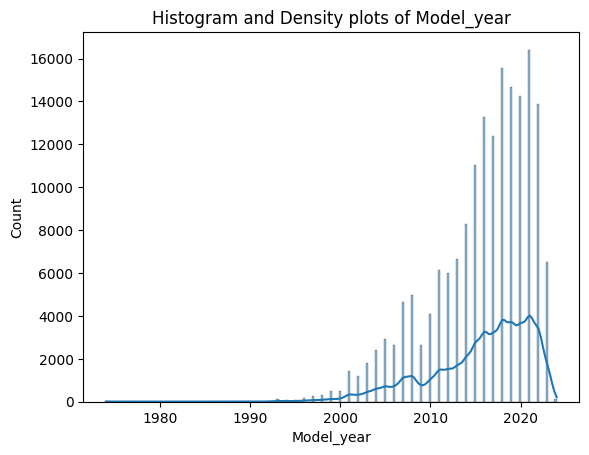

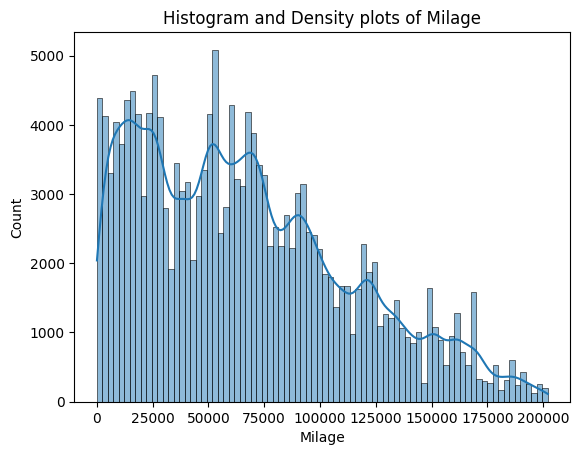

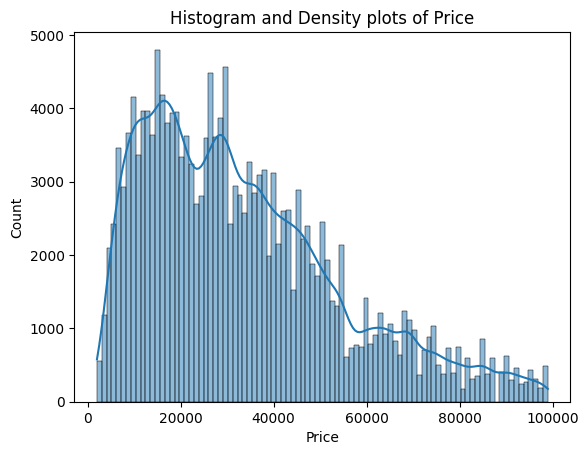

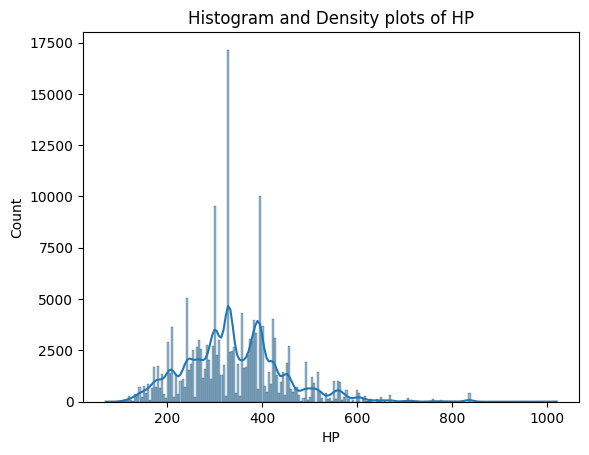

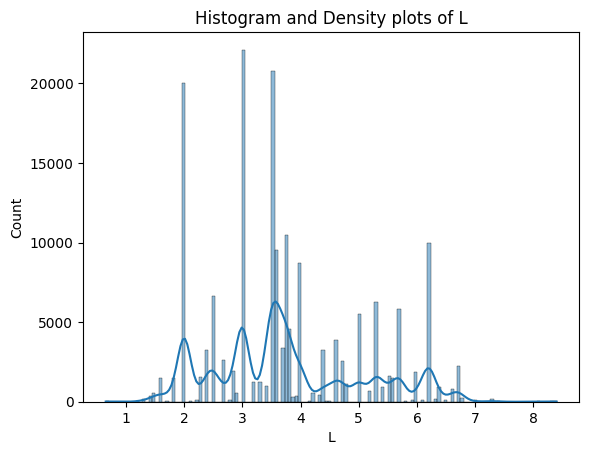

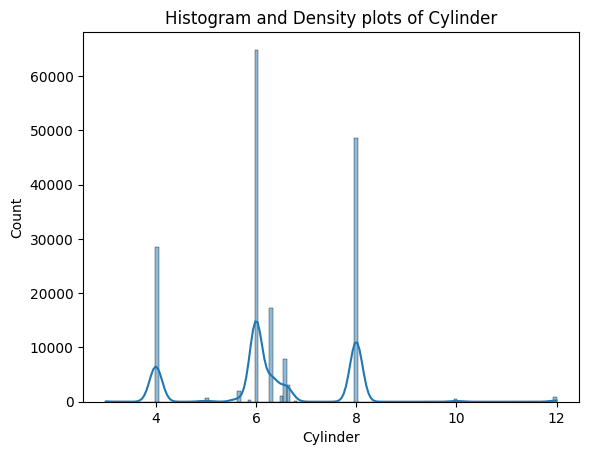

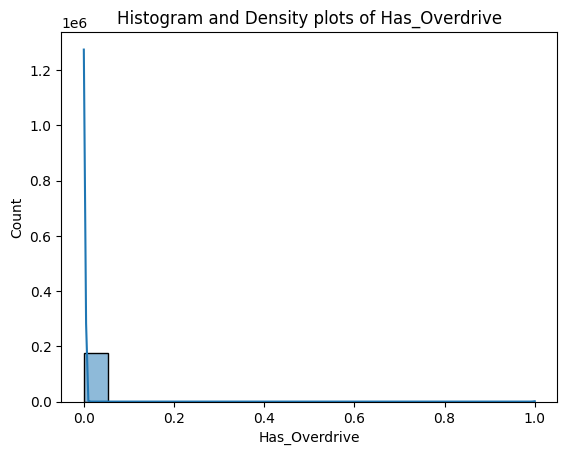

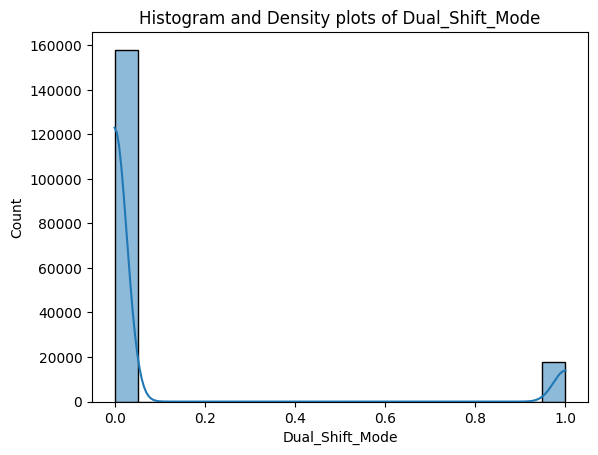

In [42]:
# 4.1. Histograms: examine distributions & skewness of data

for col in df_train.select_dtypes(include=['number']).columns:
  sns.histplot(df_train[col], kde = True)
  plt.title(f'Histogram and Density plots of {col}')
  plt.show()

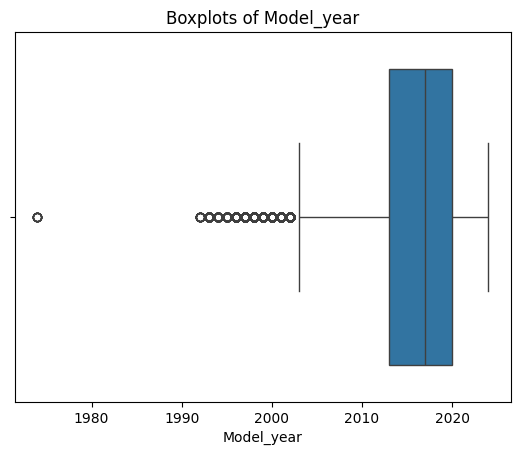

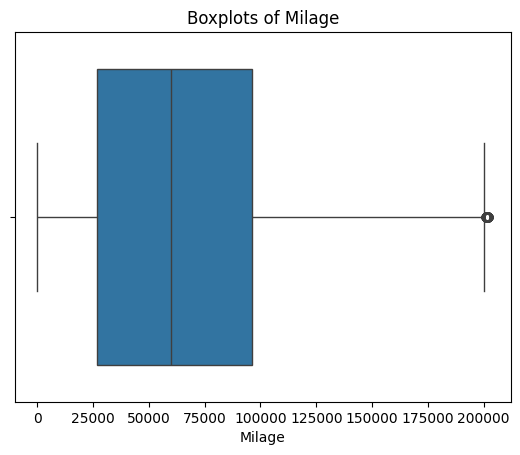

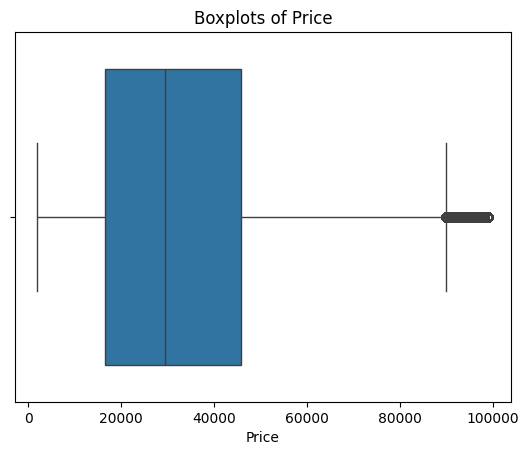

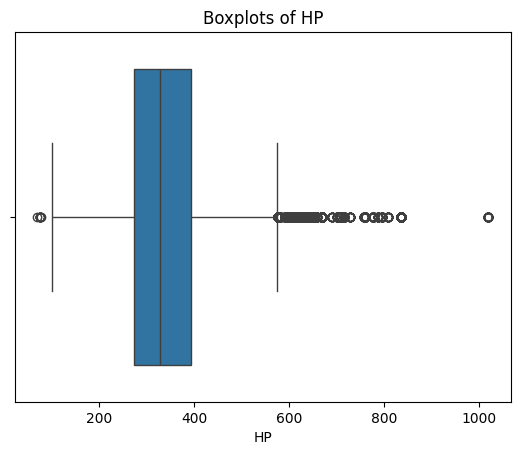

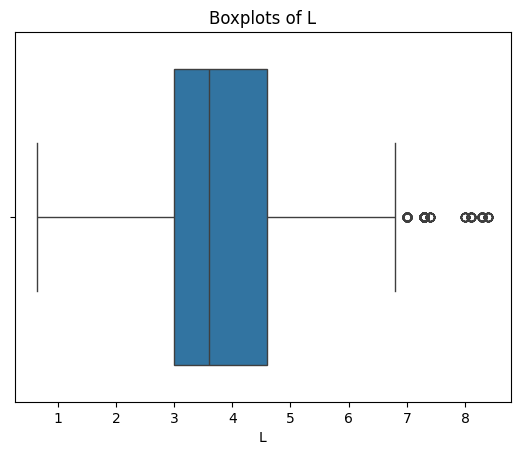

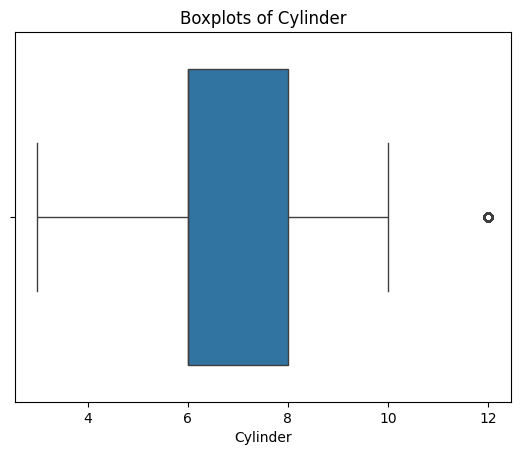

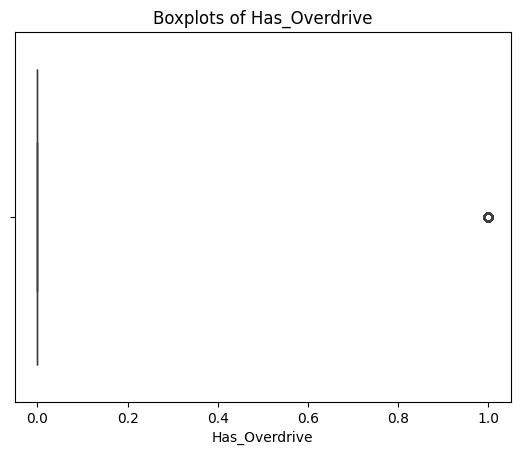

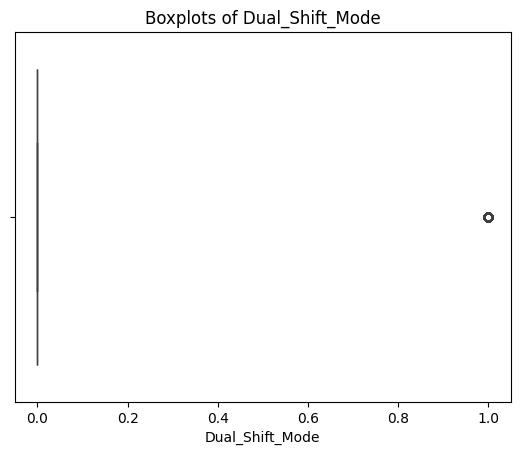

In [43]:
# 4.2. Boxplots: to observe the outliers easily

for col in df_train.select_dtypes(include=['number']).columns:
  sns.boxplot(x = df_train[col])
  plt.title(f'Boxplots of {col}')
  plt.show()

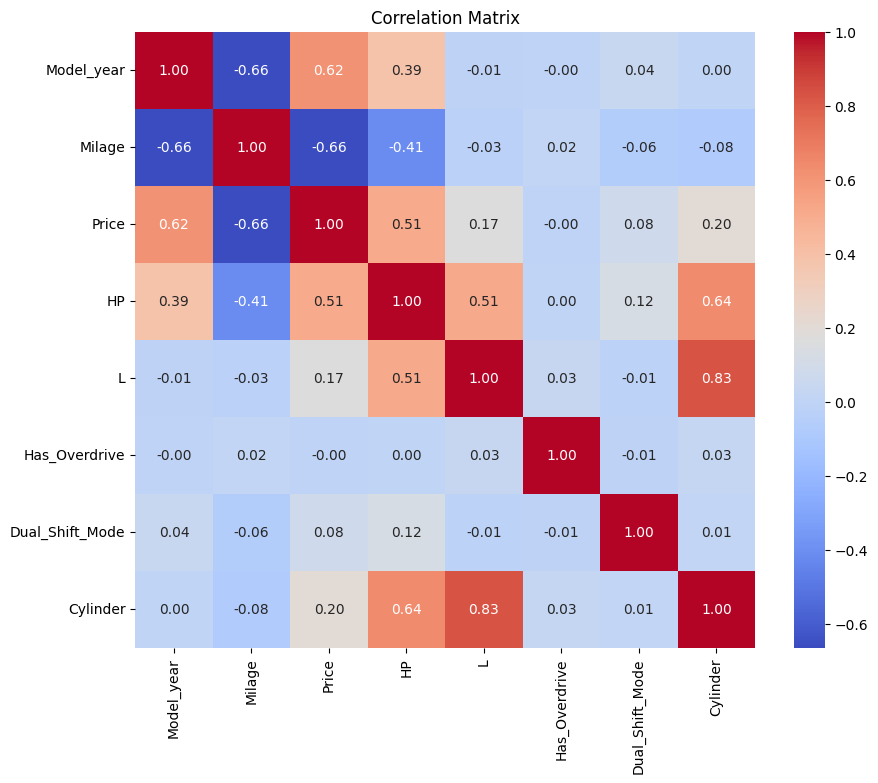

In [44]:
# 4.3. Correlation Matrix: identify strength & direction of relationships between variables

specific_columns = ['Model_year', 'Milage', 'Price', 'HP', 'L', 'Has_Overdrive', 'Dual_Shift_Mode','Cylinder']

correlation_matrix = df_train[specific_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **5. Encoding Categorical Variables**

In [45]:
# Checking uniquesness in each column
import gc

categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

gc.collect()

Accident: 2 unique values
Transmission_Type: 6 unique values
Brand_price_category: 4 unique values
Ext_Col_Group: 7 unique values
Int_Col_Group: 7 unique values
Combined_Fuel_Type: 9 unique values


69454

In [46]:
df_train.head()

,Model_year,Milage,Accident,Price,HP,L,Cylinder,Transmission_Type,Has_Overdrive,Dual_Shift_Mode,Brand_price_category,Model_Category,Ext_Col_Group,Int_Col_Group,Combined_Fuel_Type
1,2002,143250,At least 1 accident or damage reported,4999,252.0,3.9,8.0,A/T,0,0,Medium_Car,Economy,Popular Neutral Colors,Premium Color,Gasoline
2,2002,136731,None reported,13900,320.0,5.3,8.0,A/T,0,0,Medium_Car,Economy,Vibrant/High-Visibility Colors,Neutral Colors,E85 Flex Fuel
3,2017,19500,None reported,45000,420.0,5.0,8.0,A/T,0,1,Expensive_Car,Mid-range,Popular Neutral Colors,Other,Gasoline
4,2021,7388,None reported,97500,208.0,2.0,4.0,A/T,0,0,Expensive_Car,Premium,Popular Neutral Colors,Premium Color,Gasoline
5,2018,40950,None reported,29950,252.0,2.0,4.0,A/T,0,0,Medium_Car,Mid-range,Popular Neutral Colors,Other Colors,Gasoline


In [47]:
from sklearn.preprocessing import LabelEncoder

# Create an encoder instance
encoder = LabelEncoder()

# List of columns to encode
column_to_encode = [
    'Accident',
    'Combined_Fuel_Type',
    'Model_Category',
    'Transmission_Type',
    'Brand_price_category',
    'Ext_Col_Group',
    'Int_Col_Group'
]

# Loop through each column and apply LabelEncoder
for column in column_to_encode:
    # Ensure column is of type 'object' (string) or 'category'
    df_train[column] = df_train[column].astype(str)  # Convert to string if not already

    # Apply label encoding
    df_train[column] = encoder.fit_transform(df_train[column])

# Verify the result
print(df_train[column_to_encode].dtypes)  # Check the data types
print(df_train[column_to_encode].head())  # Display the first few rows of the encoded columns


Accident                int64
Combined_Fuel_Type      int64
Model_Category          int64
Transmission_Type       int64
Brand_price_category    int64
Ext_Col_Group           int64
Int_Col_Group           int64
dtype: object
   Accident  Combined_Fuel_Type  Model_Category  Transmission_Type  \
1         0                   4               0                  0   
2         1                   1               0                  0   
3         1                   4               2                  0   
4         1                   4               3                  0   
5         1                   4               2                  0   

   Brand_price_category  Ext_Col_Group  Int_Col_Group  
1                     3              2              5  
2                     3              6              2  
3                     1              2              3  
4                     1              2              5  
5                     3              2              4  


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175900 entries, 1 to 188532
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Model_year            175900 non-null  int64  
 1   Milage                175900 non-null  int64  
 2   Accident              175900 non-null  int64  
 3   Price                 175900 non-null  int64  
 4   HP                    175900 non-null  float64
 5   L                     175900 non-null  float64
 6   Cylinder              175900 non-null  float64
 7   Transmission_Type     175900 non-null  int64  
 8   Has_Overdrive         175900 non-null  int64  
 9   Dual_Shift_Mode       175900 non-null  int64  
 10  Brand_price_category  175900 non-null  int64  
 11  Model_Category        175900 non-null  int64  
 12  Ext_Col_Group         175900 non-null  int64  
 13  Int_Col_Group         175900 non-null  int64  
 14  Combined_Fuel_Type    175900 non-null  int64  
dtypes: fl

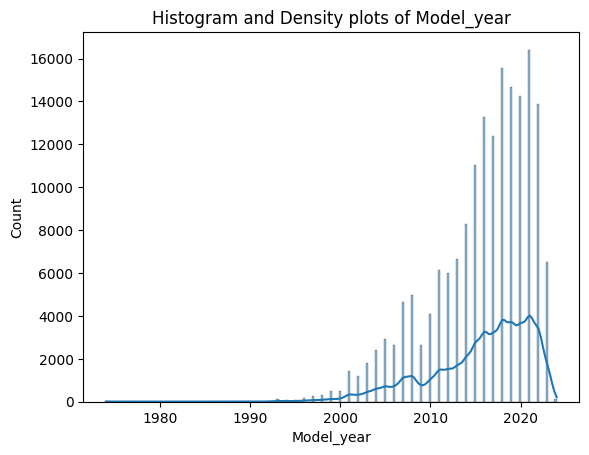

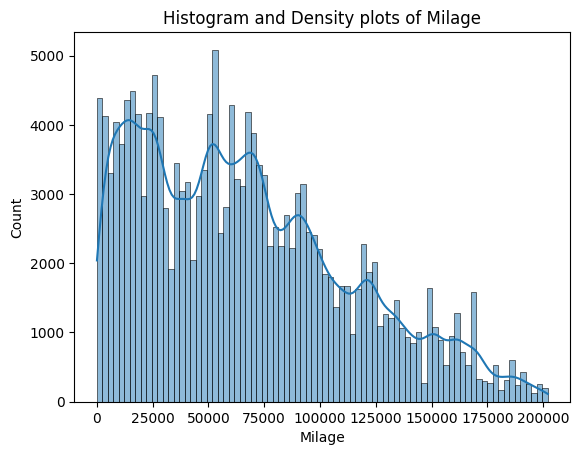

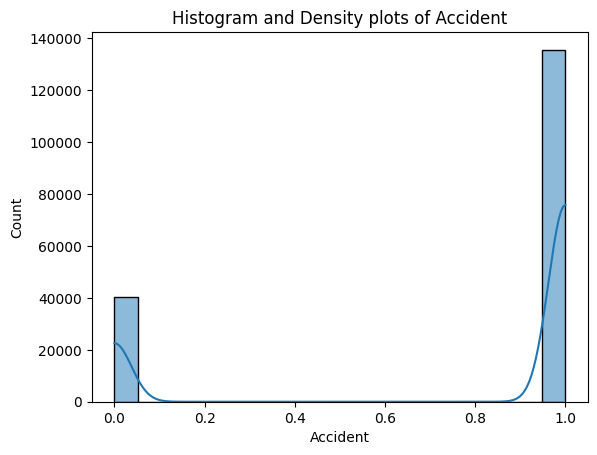

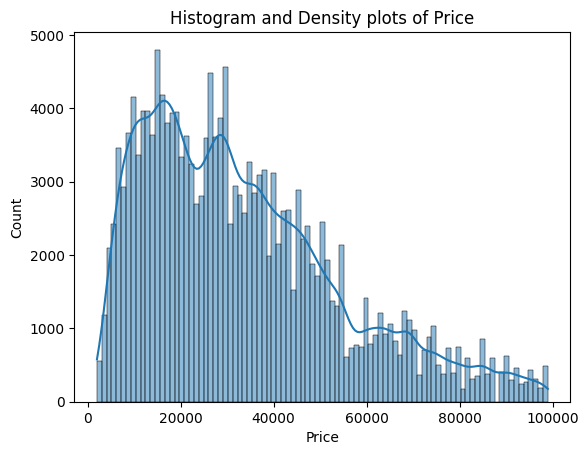

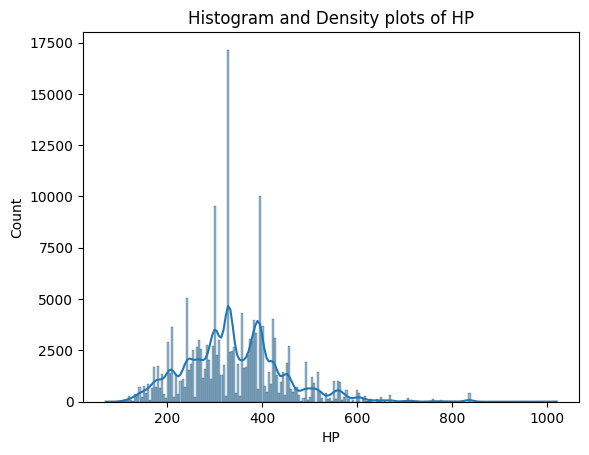

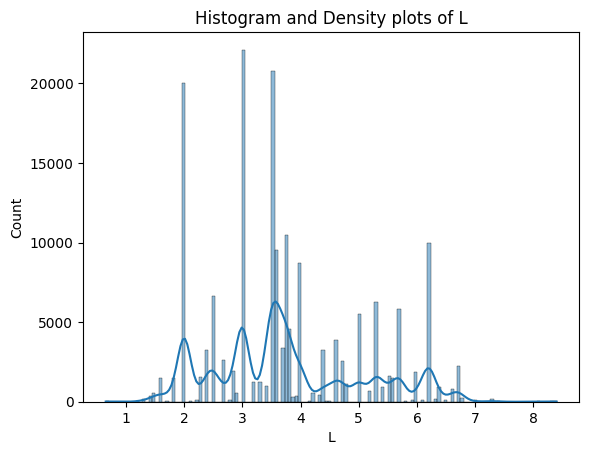

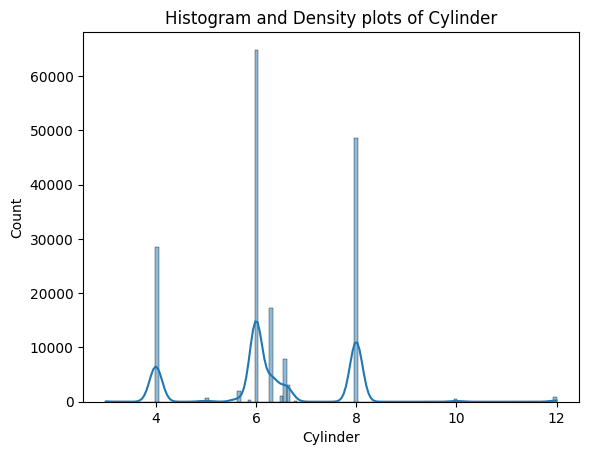

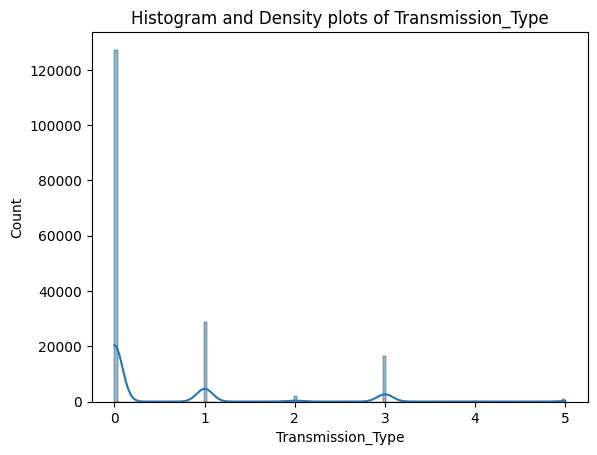

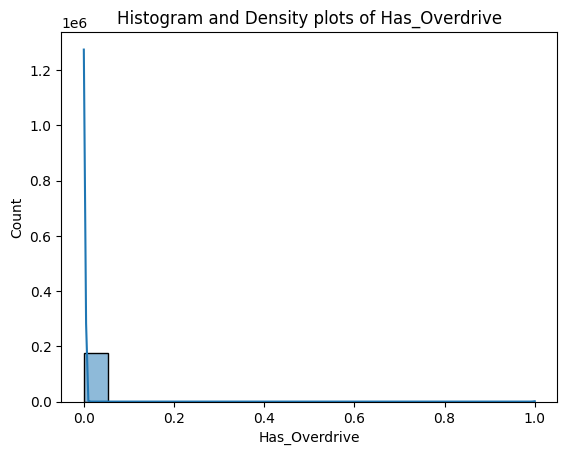

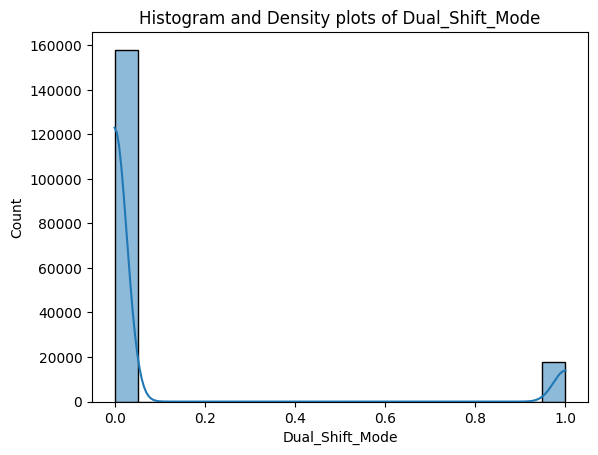

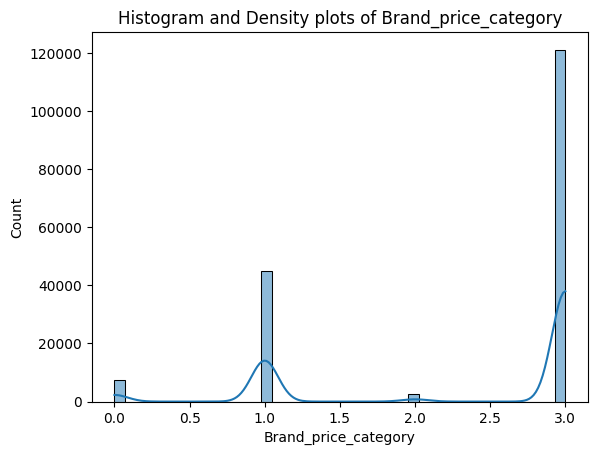

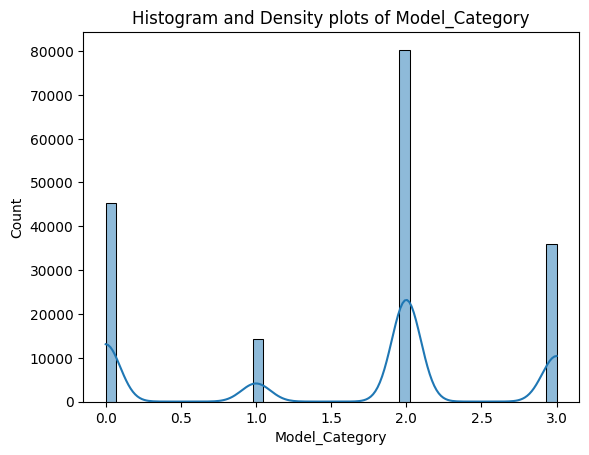

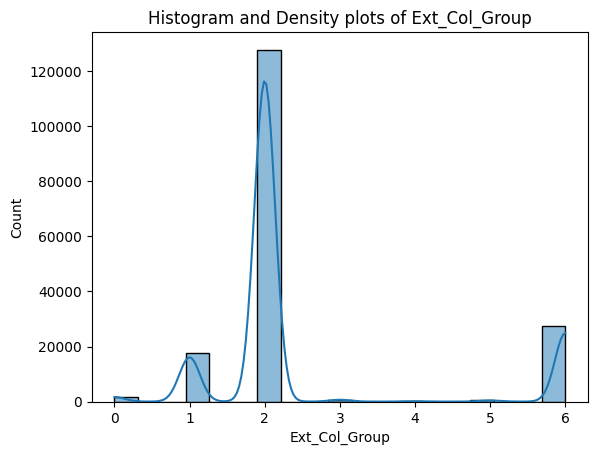

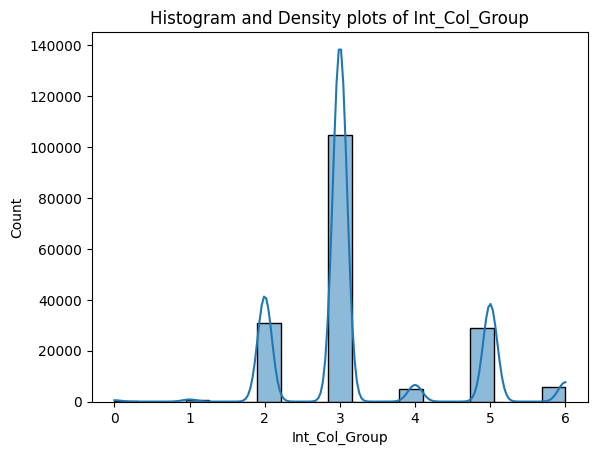

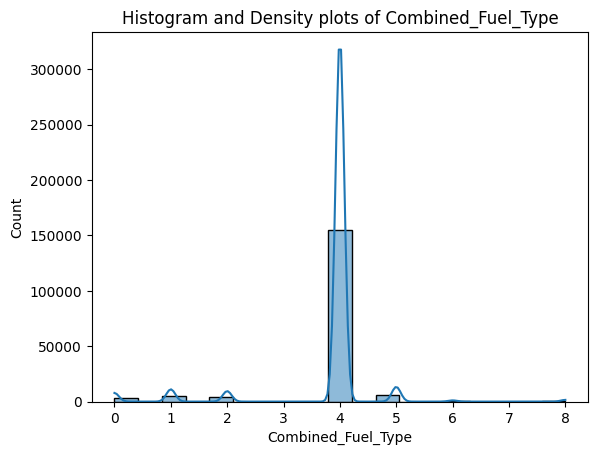

In [49]:
# Histograms: examine distributions & skewness of data

for col in df_train.select_dtypes(include=['number']).columns:
  sns.histplot(df_train[col], kde = True)
  plt.title(f'Histogram and Density plots of {col}')
  plt.show()

In [50]:
df_train.head(10)

,Model_year,Milage,Accident,Price,HP,L,Cylinder,Transmission_Type,Has_Overdrive,Dual_Shift_Mode,Brand_price_category,Model_Category,Ext_Col_Group,Int_Col_Group,Combined_Fuel_Type
1,2002,143250,0,4999,252.000000,3.900000,8.000000,0,0,0,3,0,2,5,4
2,2002,136731,1,13900,320.000000,5.300000,8.000000,0,0,0,3,0,6,2,1
3,2017,19500,1,45000,420.000000,5.000000,8.000000,0,0,1,1,2,2,3,4
4,2021,7388,1,97500,208.000000,2.000000,4.000000,0,0,0,1,3,2,5,4
5,2018,40950,1,29950,252.000000,2.000000,4.000000,0,0,0,3,2,2,4,4
6,2016,62200,1,28500,333.000000,3.000000,6.000000,0,0,0,3,0,2,3,4
7,2016,102604,1,12500,355.000000,5.300000,8.000000,0,0,0,3,0,2,2,1
8,2020,38352,1,62890,388.601172,2.700000,6.629598,1,0,0,3,2,3,3,4
9,2015,74850,1,4000,425.000000,3.000000,6.000000,0,0,1,3,3,2,3,4
11,2015,81500,1,19000,506.766644,2.865624,5.626870,0,0,0,1,2,2,2,2


# 6. Assumption Check for Regression

The key assumptions of linear regression are: linearity (a straight-line relationship between variables), independence of errors (residuals are not correlated with each other), homoscedasticity (constant variance of errors across the data), normality of residuals (errors follow a normal distribution), and no multicollinearity (independent variables are not highly correlated with each other)

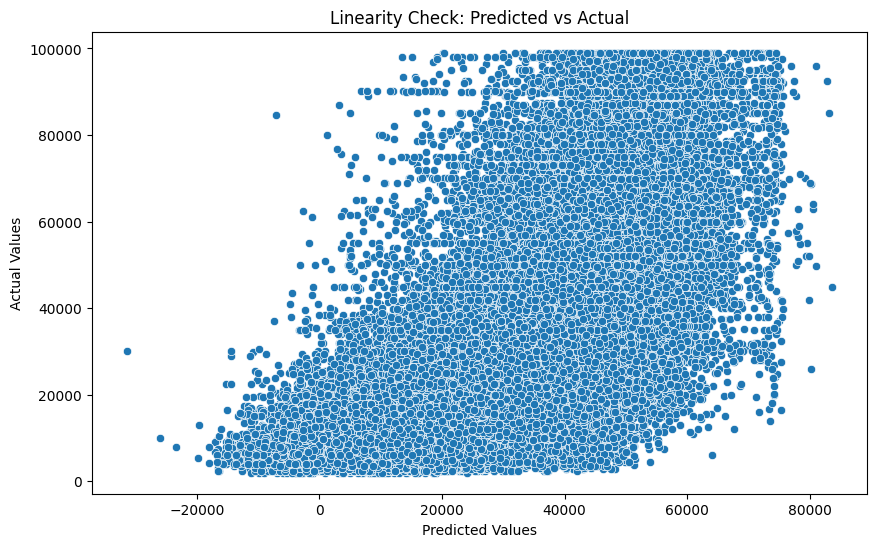

Durbin-Watson statistic: 1.9937034521497108


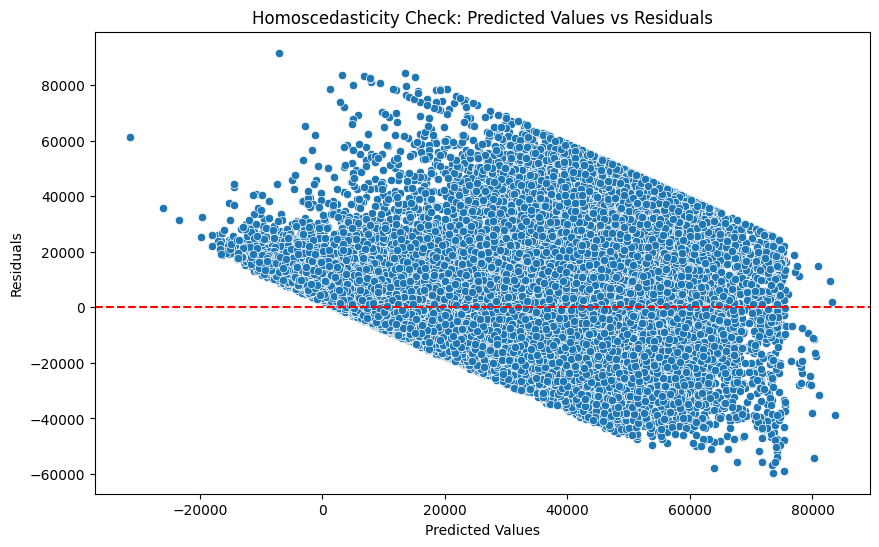

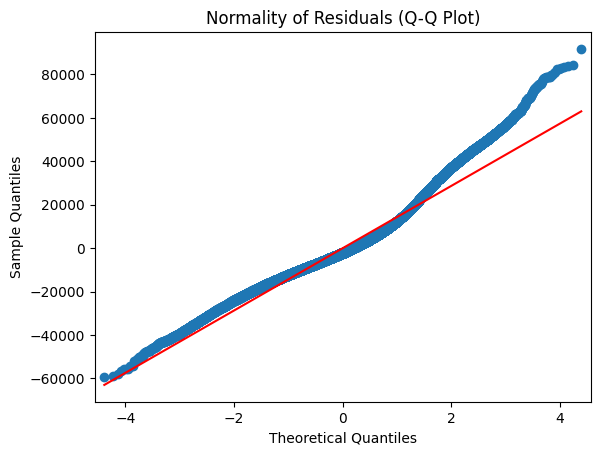

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 175900.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test p-value: 4.558719678954603e-103
D’Agostino’s K-squared test p-value: 0.0
                 Feature            VIF
0                  const  294191.522295
1             Model_year       2.252725
2                 Milage       2.074418
3               Accident       1.122364
4                     HP       2.563935
5                      L       3.440785
6               Cylinder       4.433872
7      Transmission_Type       1.057709
8          Has_Overdrive       1.002645
9        Dual_Shift_Mode       1.030205
10  Brand_price_category       1.061598
11        Model_Category       1.483749
12         Ext_Col_Group       1.025471
13         Int_Col_Group       1.006259
14    Combined_Fuel_Type       1.100427


In [51]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define independent (X) and dependent (y) variables
X = df_train.drop(columns=['Price'])
y = df_train['Price']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()
residuals = model.resid

### 1. Linearity
# Check linearity by plotting predicted values vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=y)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Check: Predicted vs Actual')
plt.show()

### 2. Independence of Errors
# Test autocorrelation in residuals (Durbin-Watson test)
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")
# Values between 1.5 and 2.5 are generally considered acceptable.

### 3. Homoscedasticity
# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Predicted Values vs Residuals')
plt.show()

### 4. Normality of Residuals
# Plot a Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Normality of Residuals (Q-Q Plot)')
plt.show()

# Perform Shapiro-Wilk test or D’Agostino’s K-squared test for normality
_, p_value_shapiro = shapiro(residuals)
_, p_value_normaltest = normaltest(residuals)
print(f"Shapiro-Wilk test p-value: {p_value_shapiro}")
print(f"D’Agostino’s K-squared test p-value: {p_value_normaltest}")
# Low p-values indicate non-normality.

### 5. Multicollinearity
# Calculate VIF (Variance Inflation Factor)
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
# VIF values above 10 generally indicate high multicollinearity.

# **7. Modelling**

In [52]:
from sklearn.preprocessing import StandardScaler

X = df_train.drop(columns=['Price'])
y = df_train['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (optional but often recommended for models like SVM, Ridge, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Linear Regression:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"  R2: {r2_score(y_test, y_pred_lr):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print("-" * 40)


Linear Regression:
  MAE: 10709.6747
  MSE: 204718792.9101
  R2: 0.5510
  RMSE: 14307.9975
----------------------------------------


In [54]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Regressor:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_dt):.4f}")
print(f"  R2: {r2_score(y_test, y_pred_dt):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.4f}")
print("-" * 40)


Decision Tree Regressor:
  MAE: 12835.0784
  MSE: 333975479.6351
  R2: 0.2674
  RMSE: 18274.9960
----------------------------------------


In [55]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Regressor:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"  R2: {r2_score(y_test, y_pred_rf):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")
print("-" * 40)


Random Forest Regressor:
  MAE: 9717.3284
  MSE: 186816871.4229
  R2: 0.5902
  RMSE: 13668.0968
----------------------------------------


In [56]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Regressor:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_gb):.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_gb):.4f}")
print(f"  R2: {r2_score(y_test, y_pred_gb):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.4f}")
print("-" * 40)

Gradient Boosting Regressor:
  MAE: 9379.8839
  MSE: 171952270.9086
  R2: 0.6228
  RMSE: 13113.0573
----------------------------------------


In [57]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# AdaBoost Regressor
ab_model = AdaBoostRegressor(random_state=42)
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)

# Evaluation
print("AdaBoost Regressor:")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_ab):.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_ab):.4f}")
print(f"  R2: {r2_score(y_test, y_pred_ab):.4f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ab)):.4f}")
print("-" * 40)

AdaBoost Regressor:
  MAE: 12005.2699
  MSE: 226561916.8786
  R2: 0.5030
  RMSE: 15051.9739
----------------------------------------


In [58]:
# Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 168937728.0
R-squared: 0.6294450759887695
Root Mean Squared Error: 12997.604702405748


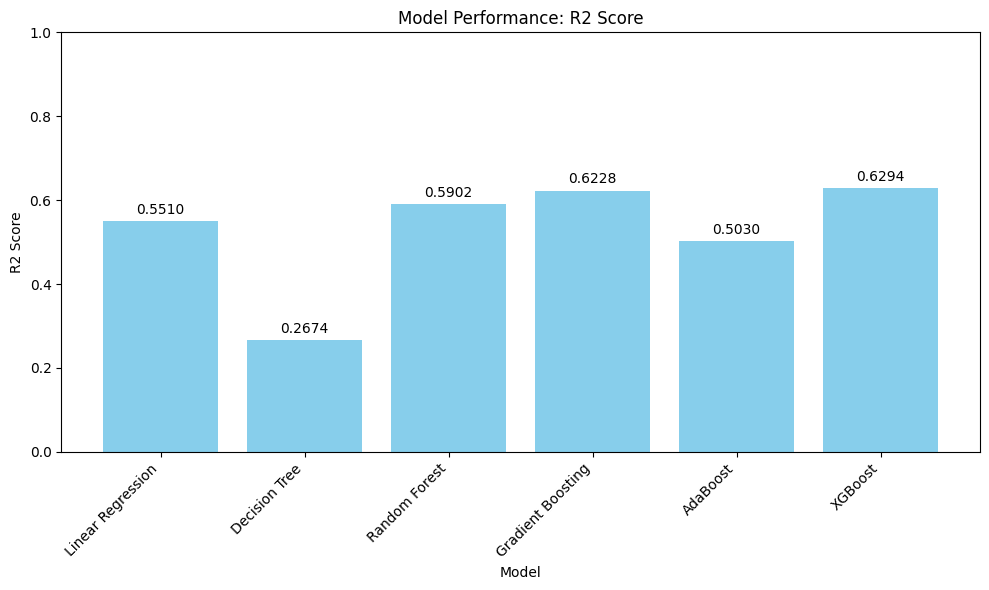

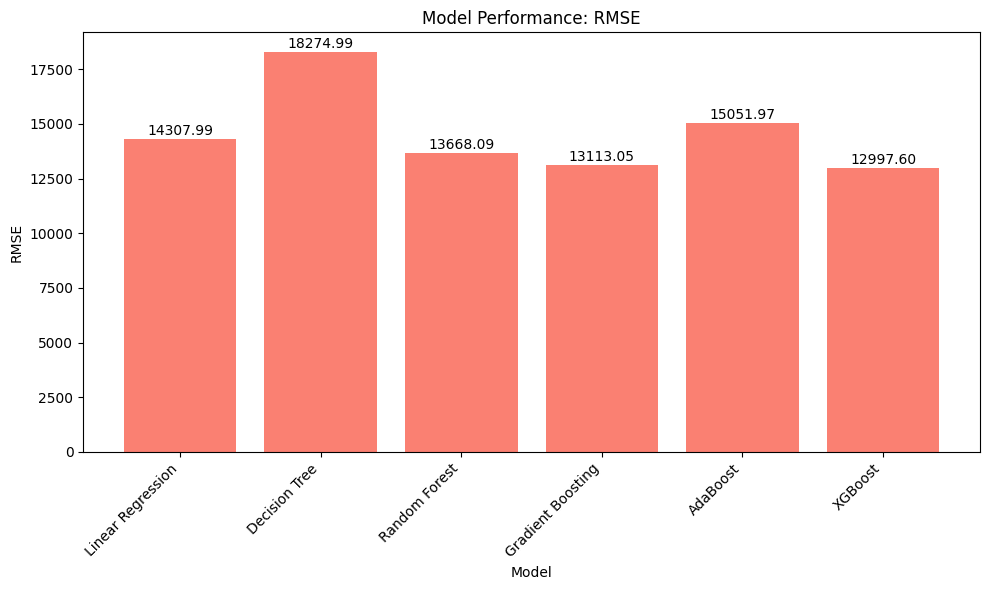

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding R2 and RMSE scores
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost']
r2_scores = [0.5510, 0.2674, 0.5902, 0.6228, 0.5030, 0.6294]
rmse_scores = [14307.99, 18274.99, 13668.09, 13113.05, 15051.97, 12997.60]

# Create bar chart for R2 scores
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color='skyblue')  # Assign the bars to the 'bars' variable
plt.title('Model Performance: R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.ylim(0, 1)  # Set y-axis limits for R2 (0 to 1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add values on top of bars
for bar, value in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Create bar chart for RMSE scores
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_scores, color='salmon')  # Assign the bars to the 'bars' variable
plt.title('Model Performance: RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar, value in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,  # Adjust vertical offset
             f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 8. Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBRegressor model with the objective
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid (as before)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create and fit GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.8s


In [63]:
best_model = grid_search.best_estimator_  # Get the best model from GridSearchCV
y_pred = best_model.predict(X_test)  # Predict on the test set

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 166877184.0
R-squared: 0.6339646577835083
Root Mean Squared Error: 12918.0952156268
